In [1]:
##################################
### Import the usual libraries ###
##################################

### Numpy
import numpy as np

### Astropy
import astropy
import astropy.coordinates as coord
import astropy.units as u

#Astropy FITS/Table handling
from astropy.io import fits, ascii
from astropy.table import Table, Column

### Pandas
import pandas as pd

### Matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18}) #make plots more readable

# # ### Yumi's RA/DEC ---> Magellanic Stream Coorindates
# import MagellanicStream as ms

### Functions used in this code
import age_functions as afunc
import extinction as extinct
leff = {'BP':0.5387,'G':0.6419,'RP':0.7667,'J':1.2345,'H':1.6393,'K':2.1757} # mircons

### Stuff Writtten by A Really Cool Professor
from dlnpyutils import utils as dln

### Other
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook

In [2]:
### Open Clusters
allStar = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/allStar-r13-l33-58932beta.fits.gz',1)
ocs = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/occam_member-DR16.fits',1)
ocs = ocs[np.where((ocs['PM_PROB']>0.01)&(ocs['RV_PROB']>0.01)&(ocs['FEH_PROB']>0.01))]

_, ocs_ind, all_ind = np.intersect1d(ocs['APOGEE_ID'],allStar['APOGEE_ID'],return_indices=True)
ocs_allStar = allStar[all_ind]
ocs = ocs[ocs_ind]

cln = np.where((ocs_allStar['FE_H']>-90.0)&(ocs_allStar['AK_TARG']>-90.0)&(ocs_allStar['LOGG']>0.0)&
               (ocs_allStar['M_H_ERR']>-90.0)&(ocs_allStar['C_FE']>-90.0)&(ocs_allStar['N_FE']>-90.0))
ocs_allStar = ocs_allStar[cln]
ocs = ocs[cln]

In [3]:
idx = []
for i in range(len(np.unique(ocs['CLUSTER']))):
    idx.append(np.squeeze(np.where(ocs['CLUSTER']==np.unique(ocs['CLUSTER'])[i])))

bad_idx = []
for i in range(len(idx)):
    try:
        len(idx[i])
    except:
#         print('bad: ',i)
        bad_idx.append(i)

In [4]:
good_names = []
for i in np.asarray(idx)[np.delete(np.asarray(list(range(len(idx)))),bad_idx)]:
    if len(i)>3:
        good_names.append(ocs['CLUSTER'][i][0])

print(np.unique(good_names))

['ASCC 16' 'ASCC 19' 'ASCC 20' 'ASCC 21' 'Berkeley 17' 'Berkeley 33'
 'Berkeley 53' 'Berkeley 66' 'Berkeley 71' 'Berkeley 98' 'Chupina 3'
 'Collinder 69' 'Collinder 70' 'Czernik 20' 'IC 166' 'King 5' 'King 7'
 'L 1641S' 'Melotte 20' 'Melotte 22' 'Melotte 71' 'NGC 1245' 'NGC 1798'
 'NGC 188' 'NGC 2158' 'NGC 2204' 'NGC 2243' 'NGC 2264' 'NGC 2324'
 'NGC 2420' 'NGC 2682' 'NGC 4337' 'NGC 6705' 'NGC 6791' 'NGC 6811'
 'NGC 6819' 'NGC 7789' 'Ruprecht 147' 'Sigma Orionis' 'Trumpler 5']


In [5]:
good_clus = np.where((ocs['CLUSTER']=='ASCC 16')|(ocs['CLUSTER']=='ASCC 19')|(ocs['CLUSTER']=='ASCC 20')|
                     (ocs['CLUSTER']=='ASCC 21')|(ocs['CLUSTER']=='Berkeley 17')|(ocs['CLUSTER']=='Berkeley 33')|
                     (ocs['CLUSTER']=='Berkeley 53')|(ocs['CLUSTER']=='Berkeley 66')|
                     (ocs['CLUSTER']=='Berkeley 71')|(ocs['CLUSTER']=='Berkeley 98')|
                     (ocs['CLUSTER']=='Chupina 3')|(ocs['CLUSTER']=='Collinder 69')|
                     (ocs['CLUSTER']=='Berkeley 70')|(ocs['CLUSTER']=='Czernik 20')|(ocs['CLUSTER']=='IC 166')|
                     (ocs['CLUSTER']=='King 5')|(ocs['CLUSTER']=='King 7')|(ocs['CLUSTER']=='L 1641S')|
                     (ocs['CLUSTER']=='Melotte 20')|(ocs['CLUSTER']=='Melotte 22')|
                     (ocs['CLUSTER']=='Melotte 71')|(ocs['CLUSTER']=='NGC 1798')|(ocs['CLUSTER']=='NGC 188')|
                     (ocs['CLUSTER']=='NGC 2158')|(ocs['CLUSTER']=='NGC 2204')|(ocs['CLUSTER']=='NGC 2243')|
                     (ocs['CLUSTER']=='NGC 2264')|(ocs['CLUSTER']=='NGC 2324')|(ocs['CLUSTER']=='NGC 2420')|
                     (ocs['CLUSTER']=='NGC 2682')|(ocs['CLUSTER']=='NGC 4337')|(ocs['CLUSTER']=='NGC 6705')|
                     (ocs['CLUSTER']=='NGC 6791')|(ocs['CLUSTER']=='NGC 6811')|(ocs['CLUSTER']=='NGC 6819')|
                     (ocs['CLUSTER']=='NGC 7789')|(ocs['CLUSTER']=='Ruprecht 147')|
                     (ocs['CLUSTER']=='Sigma Orionis')|(ocs['CLUSTER']=='Trumpler 5'))
ocs = ocs[good_clus]
ocs_allStar = ocs_allStar[good_clus]

In [ ]:
# # Ages from Donor et al. 2020
# donor1 = pd.read_csv('/Users/joshuapovick/Desktop/Research/dats/ajab77bct1_mrt.dat',comment='#',
#                      names=["Name","Qual","GLON","GLAT","Radius","Age","Rgc","pmRA","e_pmRA","pmDE","e_pmDE",
#                             "HRV","e_HRV","FEH","e_FEH","N"],sep='\s+')
# donor1 = Table.from_pandas(donor1)

# gal = coord.SkyCoord(l=donor1['GLON']*u.degree, b=donor1['GLAT']*u.degree,
#                      distance=(np.abs(donor1['Rgc'])*u.kpc),frame='galactic',galcen_distance=8.3*u.kpc)

# hel = gal.transform_to(coord.ICRS)
# distances = hel.distance.value*1000

# ### OCs xmatch paper and APOGEE
# _, d1_ind, o_ind = np.intersect1d(donor1['Name'],np.unique(ocs['CLUSTER']).replace(" ", "_"),return_indices=True)
# donor1 = donor1[d1_ind]

# donages = []
# donfehs = []
# dondist = []
# for i in range(len(np.unique(ocs['CLUSTER']))):
#     donages.append(donor1['Age'][np.where(donor1['Name']==np.unique(ocs['CLUSTER'])[i].replace(" ","_"))])
#     donfehs.append(donor1['FEH'][np.where(donor1['Name']==np.unique(ocs['CLUSTER'])[i].replace(" ","_"))])
#     dondist.append(distances[np.where(donor1['Name']==np.unique(ocs['CLUSTER'])[i].replace(" ","_"))])
    
# donages = np.squeeze(np.asarray(donages))
# donfehs = np.squeeze(np.asarray(donfehs))
# dondist = np.squeeze(np.asarray(dondist))

In [40]:
### Dib et al. 2018

table1 = pd.read_csv('/Users/joshuapovick/Desktop/Research/dats/table1.dat',comment='#',
                     names=['MWSC','NAME','RA','DEC','GLON','GLAT','DIST','LOGAGE','RCORE','RTIDAL','NUMBER',
                            'RGC','Z','Q','LAMBDA','GAMMA'],sep='\s+')

table1 = Table.from_pandas(table1)

_, dib_ind, _ = np.intersect1d(table1['NAME'],np.unique(ocs['CLUSTER']).replace(' ','_'),return_indices=True)

table1=table1[dib_ind]

# massive
massive = fits.getdata('/Users/joshuapovick/Desktop/Research/parsec/parsec_massive.fits.gz',0)
massive = massive[np.where(massive['label']==3.0)]

In [41]:
# ocs_allStar.columns

ocs_feh = []
for i in range(len(np.unique(ocs['CLUSTER']))):
    clus = np.where(ocs['CLUSTER']==np.unique(ocs['CLUSTER'])[i])
    ocs_feh.append(np.median(ocs['FE_H'][clus]))
    
ocs_feh = np.asarray(ocs_feh)

In [42]:
ocs_feh

array([-0.07 , -0.07 , -0.07 , -0.115, -0.15 , -0.3  , -0.085, -0.2  ,
       -0.22 , -0.01 ,  0.02 , -0.1  , -0.15 , -0.095, -0.14 , -0.13 ,
       -0.05 ,  0.01 ,  0.   , -0.145, -0.27 ,  0.09 , -0.22 , -0.26 ,
       -0.46 , -0.165, -0.195, -0.18 ,  0.01 ,  0.26 ,  0.16 ,  0.35 ,
       -0.05 ,  0.05 , -0.02 ,  0.125, -0.145, -0.435])

In [44]:
### pick out relevant columns for OCs CMDs and HR diagrams 

ocs_lits_colors = []
ocs_lits_kmag = []
ocs_lits_teff = []
ocs_lits_logg = []
for i in tqdm_notebook(range(len(ocs_feh))):
    iso = np.where((massive['logAge']==dln.closest(massive['logAge'],table1['LOGAGE'][i])[0])&
                   (massive['MH']==dln.closest(massive['MH'],ocs_feh[i])[0]))
    
    ocs_lits_colors.append((massive['Jmag']-massive['Ksmag'])[iso])
    ocs_lits_kmag.append(massive['Ksmag'][iso])
    
    ocs_lits_teff.append(10**massive['logTe'][iso])
    ocs_lits_logg.append(massive['logg'][iso])

IndexError: index 14 is out of bounds for axis 0 with size 14

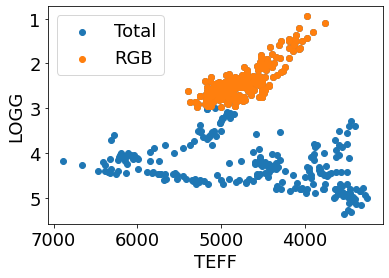

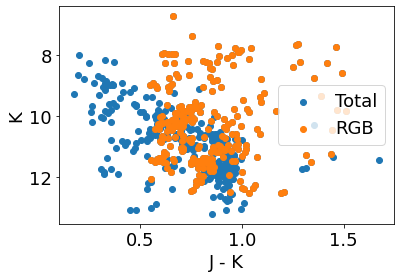

In [45]:
### Pick out RGB stars

ocs_rgb = np.where(ocs_allStar['LOGG']<3.0)

plt.scatter(ocs_allStar['TEFF'],ocs_allStar['LOGG'],label='Total')
plt.scatter(ocs_allStar['TEFF'][ocs_rgb],ocs_allStar['LOGG'][ocs_rgb],label='RGB')
plt.legend()
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel(r'TEFF')
plt.ylabel(r'LOGG')
plt.show()

plt.scatter(ocs_allStar['J']-ocs_allStar['K'],ocs_allStar['K'],label='Total')
plt.scatter((ocs_allStar['J']-ocs_allStar['K'])[ocs_rgb],ocs_allStar['K'][ocs_rgb],label='RGB')
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel(r'J - K')
plt.ylabel(r'K')
plt.show()

In [ ]:
### HR diagrams for OCs

'''Not great, not terrible'''

for i in range(len(ocs_lits_colors)):
    clus = np.where((ocs['CLUSTER']==np.unique(ocs['CLUSTER'])[o_ind][i])&(ocs_allStar['LOGG']<3.0))
    
    if np.squeeze(clus).size!=0:
    
        plt.figure(figsize=[5,5])
    
        plt.scatter(ocs_allStar['TEFF'][clus],ocs_allStar['LOGG'][clus])
    
        plt.scatter(ocs_lits_teff[i],ocs_lits_logg[i],alpha=0.5)
    
        plt.gca().invert_yaxis()
        plt.gca().invert_xaxis()
    
        plt.grid()
    
        plt.title(np.unique(ocs['Cluster'])[o_ind][i])
        plt.xlabel(r'TEFF')
        plt.ylabel(r'LOGG')
        plt.savefig('{}_HR.pdf'.format(np.unique(ocs['Cluster'])[o_ind][i]),bbox_inches='tight')
        plt.show()